# Exploratory Data Analysis of Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Let us download the training set for data analysis from Kaggle using the website -> https://www.kaggle.com/c/titanic/data

In [13]:
project_name = "Titanic-Data-Analysis" 

In [14]:
!pip install jovian --upgrade -q

In [15]:
import jovian

In [ ]:
jovian.commit(project=project_name, files=['train.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Data Preparation and Cleaning

Let us now import various libraries that we will be using for our data analysis. The libraries are :

1. Numpy : NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.



2. Pandas : Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python with Pandas is used in a wide range of fields including academic and commercial domains including finance, economics, Statistics, analytics, etc.



3. Matplotlib : Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays. It provides an object-oriented API that helps in embedding plots in applications.



4. Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we will upload and display the training data.

In [5]:
titanic_data=pd.read_csv('train.csv')

In [6]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here, we can see that the training set consists of 891 rows and 12 columns

Now, let's see the shape of the dataset using .shape

.shape is a tuple that gives you an indication of the number of dimensions in the array.

In [27]:
titanic_data.shape

(891, 12)

Now, let's see the datatypes of each column using dtypes attribute

Pandas DataFrame.dtypes attribute return the dtypes in the DataFrame. It returns a Series with the data type of each column

In [28]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Now, let's summarize the dataset using info() function which is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [39]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's see the top 5 rows and columns of the dataset using .head()

Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

In [29]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's see the last 5 rows and columns of the dataset using .tail()

Pandas tail() method is used to return last n (5 by default) rows of a data frame or series.

In [31]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Now let's see whether our dataset consists of any NaN values using .isnull()

isnull() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False .

In [33]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Let's see the summary of where the NaN values are present in the dataset using .any()

Pandas any() method is applicable both on Series and Dataframe. It checks whether any value in the caller object (Dataframe or series) is not 0 and returns True for that. If all values are 0, it will return False.

In [40]:
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Let's see the total NaN values present in Age, Cabin and Embarked using .sum() function

sum() function return the sum of the values for the requested axis. 

In [34]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now let us find out the number of people survived and the number of people that are dead using the information from he dataset

groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.

In [38]:
titanic_data.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

Here, we can see that 0 indicates the people who are dead and 1 indicates the people who have survived. There are more number of people who are dead than that of the ones who survived. 

In [42]:
titanic_data.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

Now, let's see how many males and females members are present in the dataset.

value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [49]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

We can see that there are 577 males and 314 females. There are more number of males when compared to females.

Now, let us find the how may passengers were present in different passenger classes

In [60]:
titanic_data[['Pclass']].value_counts()

Pclass
3         491
1         216
2         184
dtype: int64

Now, let us grab the Age column from the dataset.

In [63]:
titanic_data[['Age']]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


Now let's see if there is any NaN values present in the Age column

In [70]:
titanic_data[['Age']].isnull().any()

Age    True
dtype: bool

Now let's see if how many NaN values are present in the Age column

In [71]:
titanic_data[['Age']].isnull().value_counts()

Age  
False    714
True     177
dtype: int64

Here we can see that there are only 177 NaN values present in the Age column of the dataset

Again we will do the same for Cabin column for checking whether it has any NaN values and if yes then how many...

In [76]:
titanic_data[['Cabin']]

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [78]:
titanic_data[['Cabin']].isnull().any()

Cabin    True
dtype: bool

In [79]:
titanic_data[['Cabin']].isnull().value_counts()

Cabin
True     687
False    204
dtype: int64

Let's see the ports of Embarkation

In [81]:
titanic_data[['Embarked']]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


Here we can see that there are 3 ports of Embarkation. According to the dataset, the embarked are as follows:

S = Southampton

C = Cherbourg

Q = Queenstown

Let's see how may members are present in these Embarkations

In [85]:
titanic_data[['Embarked']].value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

We can see that there are more number or people from Southampton and there are very less number of people from Queenstown

Let's drop the NaN values from Cabin using dropna

Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values. By default, this function returns a new DataFrame and the source DataFrame remains unchanged.

In [19]:
Cabins=titanic_data['Cabin'].dropna()
Cabins

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [135]:
titanic_data[['Cabin']].value_counts()

Cabin      
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
D19            1
D21            1
D28            1
D30            1
A10            1
Length: 147, dtype: int64

Now let's grab only the initial letters of the Cabins and leave the numbers. In order to do that, we need to create a function called take_initial().

The argument x essentially represents a string of each row in which we will return only its initial character.

Now as the null values have been removed, we can start to apply the take_initial() function and directly updating the contents of cabins

Next we will use value_counts() method to find out the number of occurrences of each letter. I will also directly store its values in cabins_count object.

In [20]:
def take_initial(x):
    return x[0]

Cabins = Cabins.apply(take_initial)
Cabins_count = Cabins.value_counts()
Cabins_count

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

Let's grab the Fare column from the dataset

In [147]:
titanic_data[['Fare']]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


The describe() function computes a summary of statistics pertaining to the DataFrame columns. This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns.

In [148]:
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
import jovian

In [6]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

Now let's do the analysis with graphical representation to get a clear visual on the dataset

Let us see the graphical representation of the NaN values present in the dataset using Heatmap of Seaborn

Heat maps display numeric tabular data where the cells are colored depending upon the contained value. Heat maps are great for making trends in this kind of data more readily apparent, particularly when the data is ordered and there is clustering.

<AxesSubplot:>

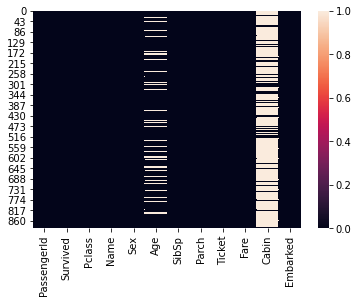

In [87]:
sns.heatmap(titanic_data.isnull())

Here, we can see light color patterns present in between the black graph which represents the presence of NaN values in Age, Cabin and Embarked columns

Now, let us graphically see the survival count of the members using Pyplot.

Pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [9]:
survived_count = titanic_data.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

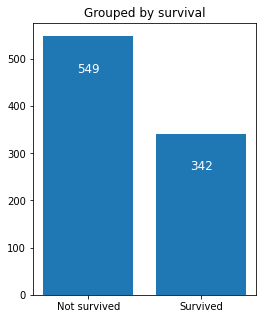

In [10]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Now let is graphically see how many males and females survived and are dead in the ship wreck of titanic using counplot of seaborn.

seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

<AxesSubplot:xlabel='Survived', ylabel='count'>

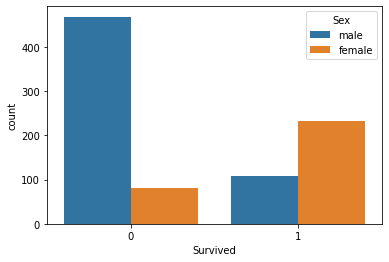

In [104]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

Now let us do the same for graphically representing the survived males and females.

here I use sum() instead of count() because we are only interested to calculate the number of survived passengers which are represented by number 1.

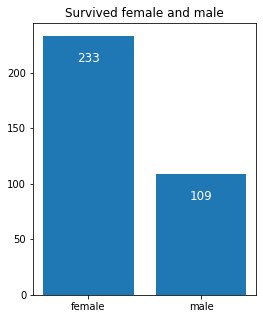

In [11]:
survived_sex = titanic_data.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Next, let us find out the distribution of ticket classes where the attribute is stored at Pclass column.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

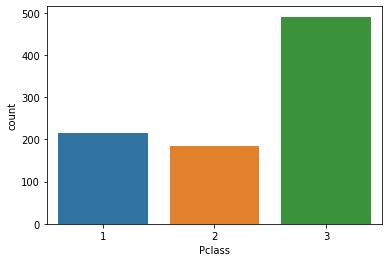

In [108]:
sns.countplot(x='Pclass',data=titanic_data)

Here, we can see that Pclass 3 consists of maximum number of passengers. 

Lets see how many males and females are present in the different passengerclasses

<AxesSubplot:xlabel='Pclass', ylabel='count'>

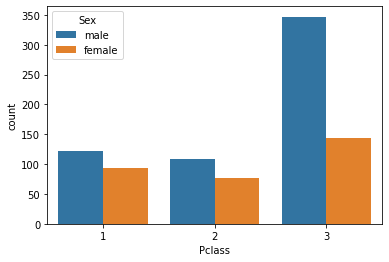

In [111]:
sns.countplot(x='Pclass', hue="Sex" , data=titanic_data)

We can see that both males and females are more in passengerclass 3

Let us present the pclass in the form of a piechart and show also show the percentage of members present in different pclasses.

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. The slices of pie are called wedges. The area of the wedge is determined by the length of the arc of the wedge.

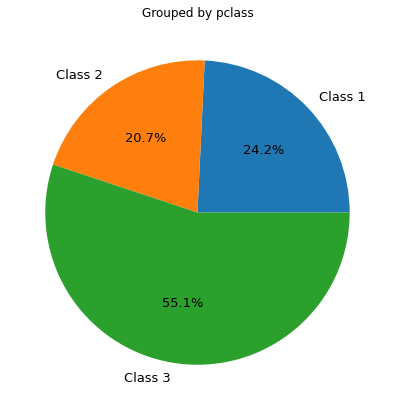

In [12]:
pclass_count = titanic_data.groupby('Pclass')['Pclass'].count()

plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

Let us also see how may members survived from different passengerclasses using a barplot.

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

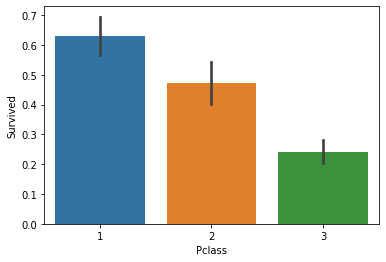

In [116]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data)

Let's also see the survival rate of which Embarkation is greater...

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

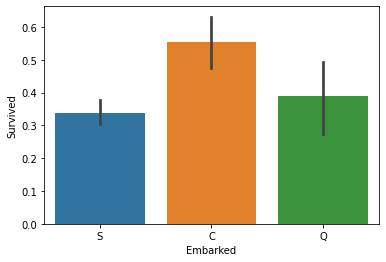

In [17]:
sns.barplot(x='Embarked', y='Survived', data=titanic_data)

Here, we can see that more number of members survived from pclass 1 

Let's see Embarkation distribution in percent shown in the form of piechart

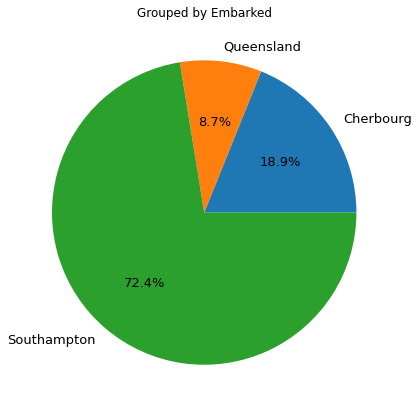

In [13]:
embarked_count = titanic_data.groupby('Embarked')['Embarked'].count()

plt.figure(figsize=(7,7))
plt.title('Grouped by Embarked')
plt.pie(embarked_count.values, labels=['Cherbourg', 'Queensland', 'Southampton'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

Next, let's see the graphical representation of Age using histogram

A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets".

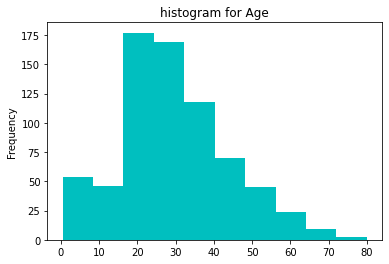

In [121]:
titanic_data.Age.plot(kind='hist',bins=10, title='histogram for Age', color='c');

Here we can see that there are more number of members in the age group 20 to 40.

The above above bargraph is represented based on frequency

Let's also see the density plot for age using kde

In statistics, kernel density estimation is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. 

<AxesSubplot:title={'center':'Density plot for Age'}, ylabel='Density'>

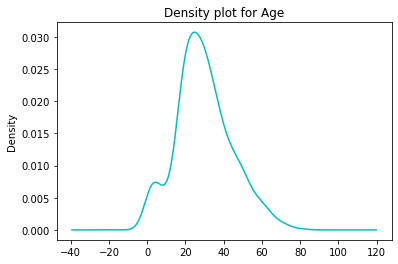

In [124]:
titanic_data.Age.plot(kind='kde', title='Density plot for Age', color='c')

Now let's see a very accurate and precise distribution of age.

Let's just to retrieve all non-NaN age values and then store the result to ages Numpy array. 
Let's use histogram() function taken from Numpy module and pass two arguments to the function: ages array and a list of bins.

We will also define labels in ages_hist_labels.

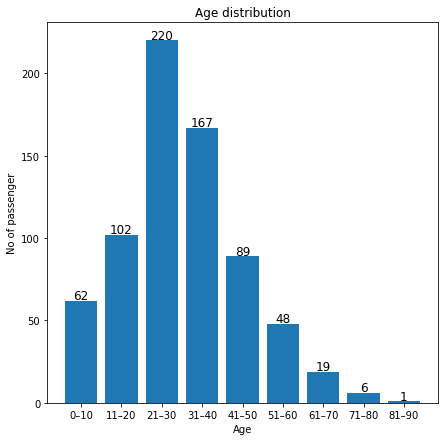

In [14]:
ages = titanic_data[titanic_data['Age'].notnull()]['Age'].values
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist


ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']
plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

Let's use plt.bar() again to display Cabin distribution in form of bar chart.

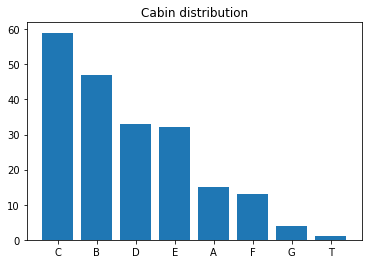

In [141]:
plt.title('Cabin distribution')
plt.bar(Cabins_count.index, Cabins_count.values)
plt.show()

Now lets see the graphical fare distribution using boxplot

A box plot is a method for graphically depicting groups of numerical data through their quartiles.

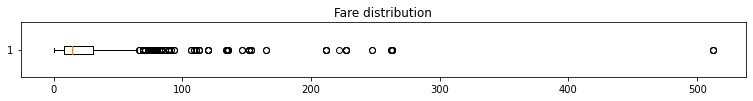

In [146]:
plt.figure(figsize=(13,1))
plt.title('Fare distribution')
plt.boxplot(titanic_data['Fare'], vert=False)
plt.show()

Here we see that the distribution is skewed to the right due to the fact that the longer tail is located at the right part of the box, where most of the data points are spread more densely at the range of approximately 10 to 35 currency unit.

In [7]:
import jovian

In [8]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Asking and Answering Questions

Let's have some questions and try to provide answers to those questions.

#### Question-1 : What is the proportion of the passengers who survived? 

Let's first get all the passengers that survived
To get the proportion, we need to divide survived passengers count by total passengers on titanic.

In [15]:
survived_passengers = titanic_data[titanic_data.Survived == 1]
survived_proportion = len(survived_passengers) / len(titanic_data)
round(survived_proportion, 2) #rounding value to 2 decimals

0.38

#### Answer-1 : 0.38

#### Question-2 : What is the median fare of the passengers? (give answer upto 4 decimals)

Let's first sort the values in the Fare column and find the value at mid position

In [18]:
fares = titanic_data.Fare.sort_values().values
length = len(fares)

fares[length//2]

14.4542

#### Answer-2 : 14.4542

#### Question-3 : Create a subset of the survived passengers and how many survived passengers had embarked from Southampton?

Let's first get the passengers who have survived and then count the passenger embarked from each port

In [19]:
survived_passengers = titanic_data[titanic_data.Survived == 1]
survived_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [20]:
survived_passengers.Embarked.value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

#### Answer-3 : Subset is created for survived passengers and the count of survived passengers from Southampton is '217'

#### Question-4 : Which feature i.e. Name, Ticket, Age, plays an important role in the survival of passengers? 

We have seen in the above analysis that people below age 18 has more number of survival than people aged above 18. So 'Age' plays a very important role in the survival of passengers.

Name cannot be given priority just for survival and Ticket is generated randomly so cannot be a factor for survival of passengers.

#### Answer-4 : Age

#### Question-5 : What is the percentage of women and men survived and whose percentage is greater than the other one?

Let us first find the percentage of male and female who survived.

#### Ans-5 : 

In [10]:
import numpy as np

male_survived_percentage = 100*np.mean(titanic_data['Survived'][titanic_data['Sex'] == 'male'])
female_survived_percentage = 100*np.mean(titanic_data['Survived'][titanic_data['Sex'] == 'female'])

print('The percentage of Male passengers survived is ',male_survived_percentage)
print('The percentage of Female passengers survived is ',female_survived_percentage)

if male_survived_percentage < female_survived_percentage:
    print('Survival percentage of Female passengers is greater than Male passengers')
else:
    print('Survival percentage of Male passengers is greater than Female passengers')    

The percentage of Male passengers survived is  18.890814558058924
The percentage of Female passengers survived is  74.20382165605095
Survival percentage of Female passengers is greater than Male passengers


#### Question-6 : Who were given more priority Children or Adults? 

Let us first find the percentage of Children and Adults who survived.

#### Ans-6 :

In [11]:
import numpy as np
print("The percentage of survival of Children is ", 100*np.mean(titanic_data['Survived'][titanic_data['Age'] < 18]))
print("The percentage of survival of Adults is ", 100*np.mean(titanic_data['Survived'][titanic_data['Age'] >= 18]))



The percentage of survival of Children is  53.98230088495575
The percentage of survival of Adults is  38.10316139767055


#### Children were given more priority

In [9]:
import jovian

In [10]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

From my Exploratory Data Analysis of Titanic dataset, we can conclude that women had higher chances of survival. When comparing the suvival percentage of children and Adults, we can see that Children were given more priority than Adults. We also observed that the number of passengers present in the Pclass 3 is greater than other Pclasses and unfortunately passengers from Pclass 3 died the most while passengers from Pclass 1 survived the most. Passengers embarked from Southampton were greater than others and unfortunately died the most. We also observed that there were many passengers between the age group 20 to 40.

In [11]:
import jovian

In [12]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

References:
- https://www.kaggle.com
- https://seaborn.pydata.org/
- https://pandas.pydata.org/
- https://www.youtube.com/
- https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-6-exploratory-data-analysis-a-case-study

Future Work :
- Performing Feature engineering 
- Using Machine Learning to make Models
- Model evaluation and testing
- Giving a good success rate.

In [13]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
